In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import os
import seaborn as sns

# loading the data

In [2]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# describing the data

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# information about the data sets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
df["species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

# check for null values

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

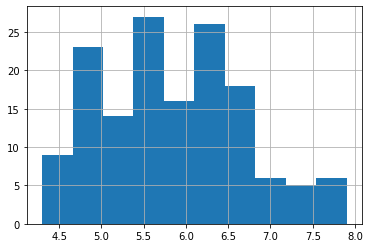

In [7]:
df["sepal_length"].hist()

<AxesSubplot:>

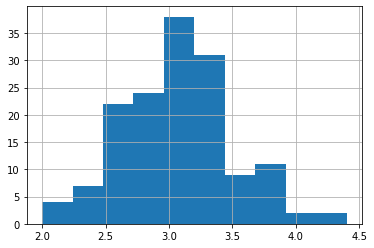

In [8]:
df["sepal_width"].hist()

<AxesSubplot:>

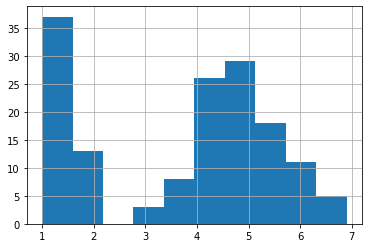

In [9]:
df["petal_length"].hist()

<AxesSubplot:>

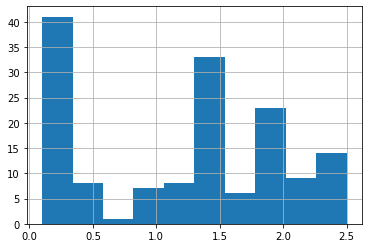

In [10]:
df["petal_width"].hist()

In [11]:
colors=["red","black","blue"]
Species=["Iris-versicolor",
"Iris-virginica",
"Iris-setosa"  ]

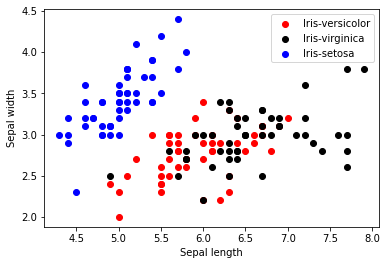

In [12]:
for i in range(3):
    x=df[df["species"]==Species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],c=colors[i],label=Species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

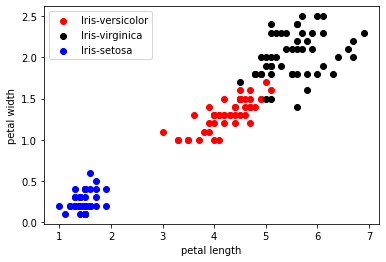

In [13]:
for i in range(3):
    x=df[df["species"]==Species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],c=colors[i],label=Species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

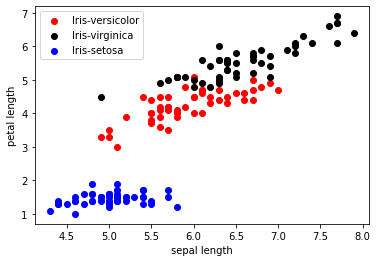

In [14]:
for i in range(3):
    x=df[df["species"]==Species[i]]
    plt.scatter(x["sepal_length"],x["petal_length"],c=colors[i],label=Species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

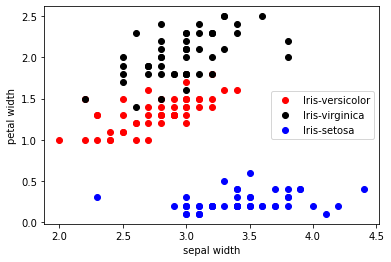

In [15]:
for i in range(3):
    x=df[df["species"]==Species[i]]
    plt.scatter(x["sepal_width"],x["petal_width"],c=colors[i],label=Species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

# correalation matrix

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

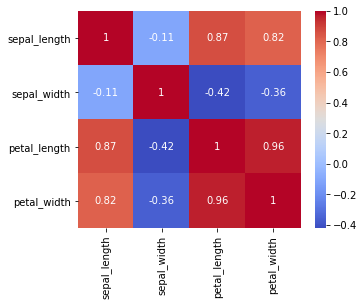

In [17]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df["species"]=le.fit_transform(df["species"])
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [53]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
x_train, x_test ,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [54]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [55]:
model1.fit(x_train,y_train)

LogisticRegression()

In [56]:
print("Accuracy: ", model1.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [57]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()

In [58]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
print("Accuracy: ", model2.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [60]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()

In [61]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
print("Accuracy: ", model3.score(x_test,y_test)*100)

Accuracy:  93.33333333333333
